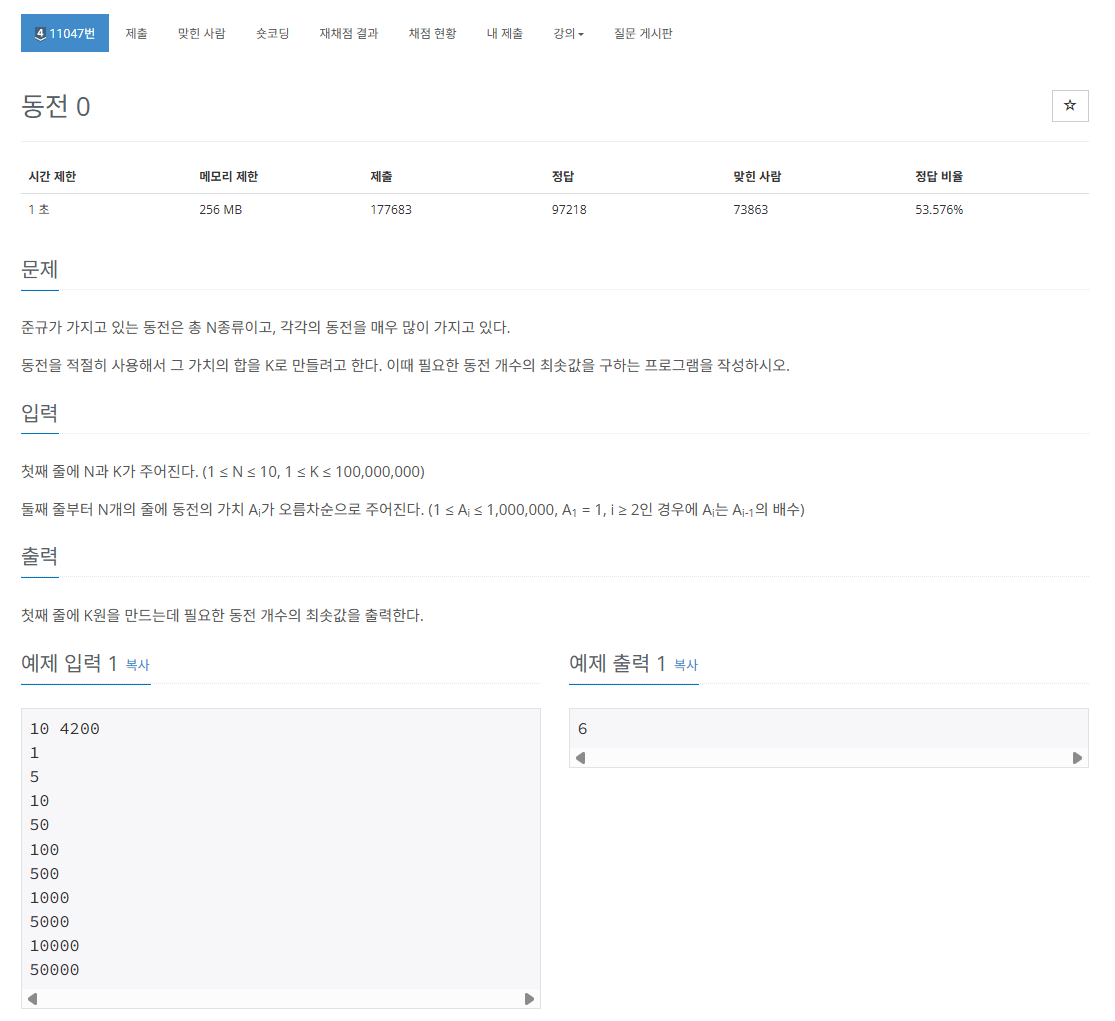

In [4]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-08-09 033630.png")
img

In [ ]:
import sys
input=sys.stdin.readline
N,K=map(int,input().split())

coin_list=[int(input()) for _ in range(N)]

count = 0

while(K):
    if K-coin_list[-1]>=0:
        Q=K//coin_list[-1]
        K-=Q*coin_list[-1]
        count+=Q
    else:
        coin_list.pop()
print(count)


3200
2200
1200
200
100
0
6


거스름돈 문제의 전형적인 형태로, 그리디(Greedy) 알고리즘의 핵심을 정확히 파악하고 계십니다. 가장 큰 동전부터 사용하는 아이디어를 훌륭하게 코드로 옮기셨습니다.

-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 4.5 / 5.0 점**

      * **평가:** **정확하고 효율적인 정답입니다.** `while` 루프와 `pop()`을 조합하여 가장 큰 동전부터 처리하는 로직을 창의적으로 구현했습니다. 이 문제의 핵심인 그리디 접근법을 완벽하게 이해하고 적용했습니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 훌륭한 그리디 로직을 그대로 유지하면서, 데이터를 처리하는 방식을 조금 더 일반적이고 가독성이 높은 `for` 루프 구조로 변경한 버전입니다.

-----

### \#\# Gemini 추천 코드

`while` 루프와 `pop()` 대신, 동전 리스트를 뒤에서부터 순회하는 `for` 루프를 사용하는 방식입니다.

```python
import sys

input = sys.stdin.readline
N, K = map(int, input().split())
coins = [int(input()) for _ in range(N)]

count = 0

# 동전을 큰 순서대로 확인하기 위해 뒤에서부터 순회
for i in range(N - 1, -1, -1):
    coin = coins[i]
    
    # 만약 현재 동전이 K보다 크면 사용할 수 없으므로 건너뜀
    if coin > K:
        continue
    
    # 현재 동전으로 K를 나눈 몫이 바로 사용할 동전의 개수
    num_of_coins = K // coin
    count += num_of_coins
    
    # K를 나머지 값으로 갱신
    K %= coin
    
    # 만약 K가 0이 되면 더 이상 계산할 필요가 없으므로 종료
    if K == 0:
        break

print(count)
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **완벽한 그리디 알고리즘입니다.** 이 문제가 그리디 알고리즘으로 풀리는 이유는 "모든 동전의 가치가 이전 동전 가치의 배수"라는 중요한 조건이 숨어있기 때문입니다. 이 조건 덕분에, 매 순간 가장 가치가 큰 동전을 최대한 사용하는 것이 항상 최적의 해를 보장합니다. 이 핵심을 정확히 파악하고 구현하셨습니다. 시간 복잡도는 O(N)으로 최적입니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

#### **내 풀이에서 칭찬할 점**

  * **`while(K)`:** `K`가 0이 되면 `False`로 취급되어 자동으로 멈추는 파이썬의 특징을 잘 활용한 간결한 조건문입니다.
  * **`pop()` 활용:** 리스트의 마지막 요소를 O(1)로 가져오고 제거하는 `pop()`의 특성을 스택처럼 활용하여, 가장 큰 동전을 효율적으로 처리했습니다.

#### **배울 점**

  * **`for` 루프를 이용한 역순 순회:** 추천 코드의 `for i in range(N - 1, -1, -1):` 구문을 참고해 보세요. 이 방식은 데이터를 직접 수정(`pop`)하지 않고, 인덱스를 통해 순회만 합니다. 이는 "데이터와 로직을 분리한다"는 좋은 프로그래밍 습관이며, 코드를 읽는 사람이 "아, 동전 리스트를 큰 것부터 순회하는구나"라고 의도를 더 쉽게 파악할 수 있게 해줍니다.

-----

### \#\# 3. 또 다른 측면: 데이터의 불변성(Immutability)

이번 코드에서 논의해 볼 만한 좋은 주제는 \*\*'데이터의 불변성'\*\*입니다.

  * **사용자님의 방식:** `coin_list.pop()`을 통해 `coin_list`라는 원본 데이터를 **직접 수정**하면서 로직을 진행합니다. 이 문제에서는 잘 동작하지만, 더 복잡한 문제에서는 원본 데이터가 계속 바뀌는 것이 디버깅을 어렵게 만드는 원인이 될 수 있습니다.

  * **추천 코드의 방식:** `for` 루프를 통해 `coins` 리스트를 \*\*읽기 전용(read-only)\*\*으로 사용합니다. `coins` 리셔스트 자체는 전혀 변하지 않고, `K`와 `count`라는 별도의 변수만 계속 업데이트됩니다.

**왜 중요한가?**
입력받은 데이터를 가능한 한 원본 그대로 유지하는 습관은, 코드의 동작을 예측하기 쉽게 만들고 얘기치 않은 부수 효과(side effect)를 줄여줍니다. "이 함수는 데이터를 읽기만 할 뿐, 바꾸지는 않는다"는 것을 보장하면 코드가 훨씬 더 안정적이고 신뢰할 수 있게 됩니다.

물론 코딩 테스트에서는 속도와 간결함이 중요하므로 사용자님의 풀이도 훌륭한 정답입니다. 다만, 이런 구조적인 차이점을 인지하고 계시면 앞으로 더 크고 복잡한 프로그램을 설계할 때 큰 도움이 될 것입니다.